Loading MNIST dataset...
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)
Training the CNN model...
Epoch 1/5
300/300 - 5s - 18ms/step - accuracy: 0.9275 - loss: 0.2526 - val_accuracy: 0.9791 - val_loss: 0.0688
Epoch 2/5
300/300 - 5s - 15ms/step - accuracy: 0.9807 - loss: 0.0650 - val_accuracy: 0.9847 - val_loss: 0.0457
Epoch 3/5
300/300 - 4s - 15ms/step - accuracy: 0.9864 - loss: 0.0443 - val_accuracy: 0.9877 - val_loss: 0.0395
Epoch 4/5
300/300 - 4s - 15ms/step - accuracy: 0.9898 - loss: 0.0335 - val_accuracy: 0.9876 - val_loss: 0.0354
Epoch 5/5
300/300 - 5s - 15ms/step - accuracy: 0.9914 - loss: 0.0275 - val_accuracy: 0.9899 - val_loss: 0.0329
✅ CNN Test Accuracy: 98.99%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

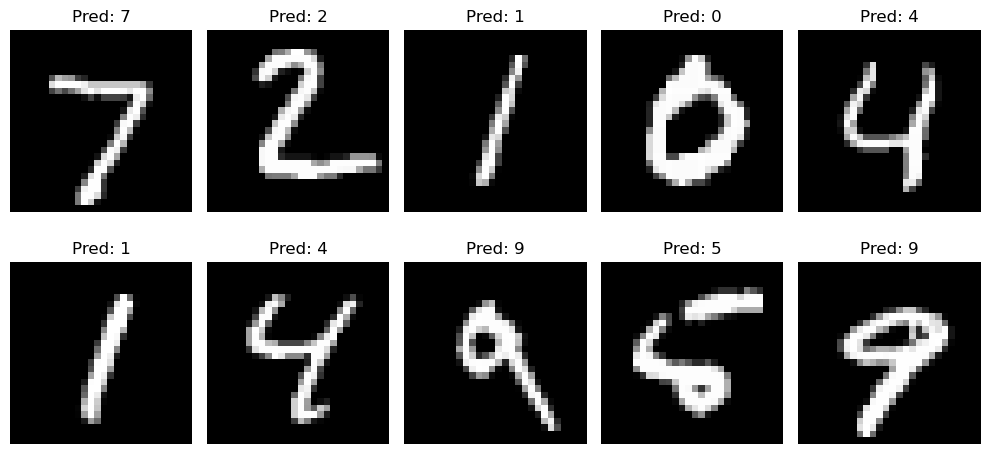

In [2]:
# Handwritten Character Recognition using CNN

# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Step 2: Load dataset
print("Loading MNIST dataset...")
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Step 3: Preprocess data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Step 4: Build CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Step 5: Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train model
print("Training the CNN model...")
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200, verbose=2)

# Step 7: Evaluate model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Test Accuracy: {:.2f}%".format(scores[1]*100))

# Step 8: Visualize predictions
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    img = X_test[i].reshape(28,28)
    plt.imshow(img, cmap='gray')
    pred = np.argmax(model.predict(X_test[i].reshape(1,28,28,1)))
    plt.title(f"Pred: {pred}")
    plt.axis('off')
plt.tight_layout()
plt.show()
